In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/123123123123/spambase.csv


In [50]:
df = pd.read_csv("/kaggle/input/123123123123/spambase.csv")
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , recall_score , precision_score, roc_auc_score

In [52]:
print(df.shape)
print(df.size)
print(df.describe)
print(df.info())

(4601, 58)
266858
<bound method NDFrame.describe of       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0     

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

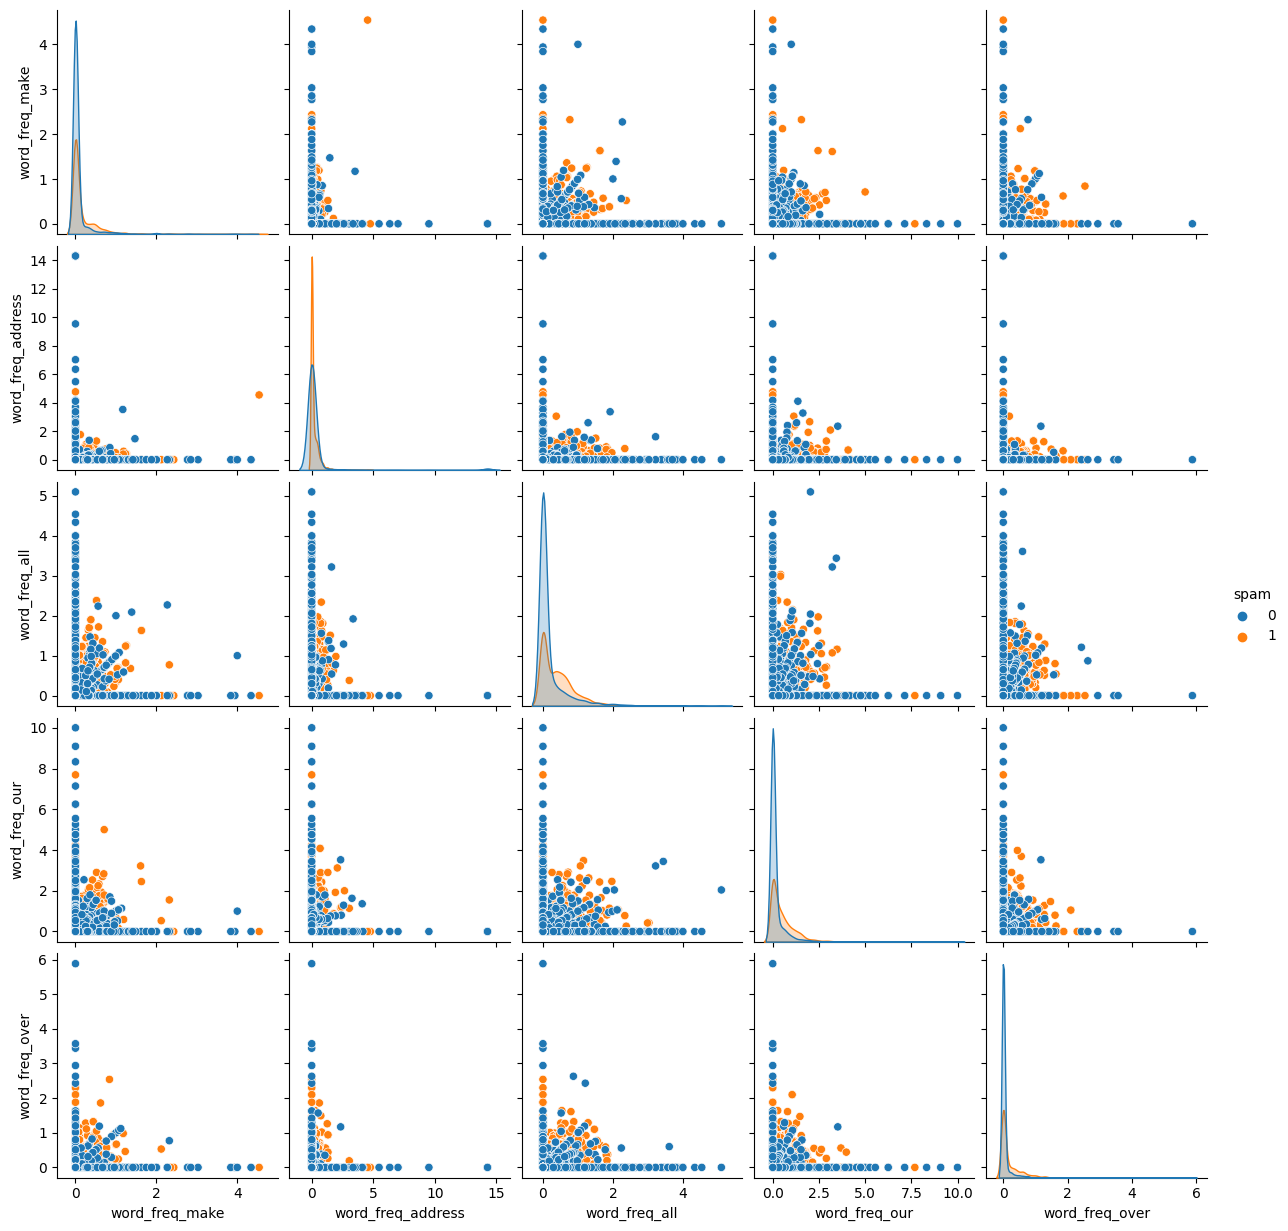

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = df[['word_freq_make', 'word_freq_address', 'word_freq_all', 
             'word_freq_our', 'word_freq_over', 'spam']]

sns.pairplot(subset, hue='spam')
plt.show()




In [54]:
X_spam = df.drop("spam" , axis=1)
y_spam = df["spam"]

In [43]:
X_train_spam , X_test_spam , y_train_spam , y_test_spam = train_test_split(X_spam , y_spam, test_size=0.2, random_state=42)    

In [56]:
nb_spam = GaussianNB()
nb_spam.fit(X_train_spam,y_train_spam)


GaussianNB()

In [57]:
y_pred = nb_spam.predict(X_test_spam)

In [61]:
Accuuracy_spam= accuracy_score(y_test_spam ,y_pred)*100
Accuuracy_spam

82.08469055374593

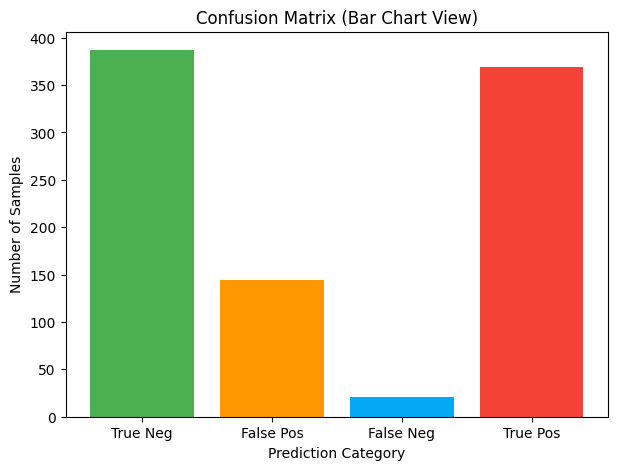

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test_spam, y_pred)
classes = ['Not Spam', 'Spam']


values = cm.flatten()
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

plt.figure(figsize=(7,5))
bars = plt.bar(labels, values, color=['#4CAF50', '#FF9800', '#03A9F4', '#F44336'])
plt.title('Confusion Matrix (Bar Chart View)')
plt.xlabel('Prediction Category')
plt.ylabel('Number of Samples')



plt.show()


In [73]:
recall_np_spam = recall_score(y_test_spam , y_pred)*100
recall_np_spam

94.61538461538461

In [76]:
precision_nb_spam = precision_score(y_test_spam , y_pred)*100
precision_nb_spam

71.9298245614035

In [80]:
roc_auc_nb_spam = roc_auc_score(y_test_spam , y_pred)*100
roc_auc_nb_spam

83.74837027379401